# Home Price Prediction

## Data Set
The data set selected contains home sale prices for King County sold between May 2014 and May 2015.

## Objectives
Explore and preprocess the data set for regression models.
Build linear and ridge regression models

## Machine Learning models used:
1. Linear regression
2. Ridge regression

## Data Set Description 

There are 21 variables in this data set:

    2 categorical variables,
    17 continuous variables,
    1 variable to store house ID, and
    1 variable to store date house sold.


## Importing Libraries

In [3]:
import sys
!{sys.executable} -m pip install seaborn

In [11]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings

warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [6]:
raw_data = pd.read_csv("kc_house_data.csv")
print(raw_data.columns)
raw_data.head()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [8]:
raw_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

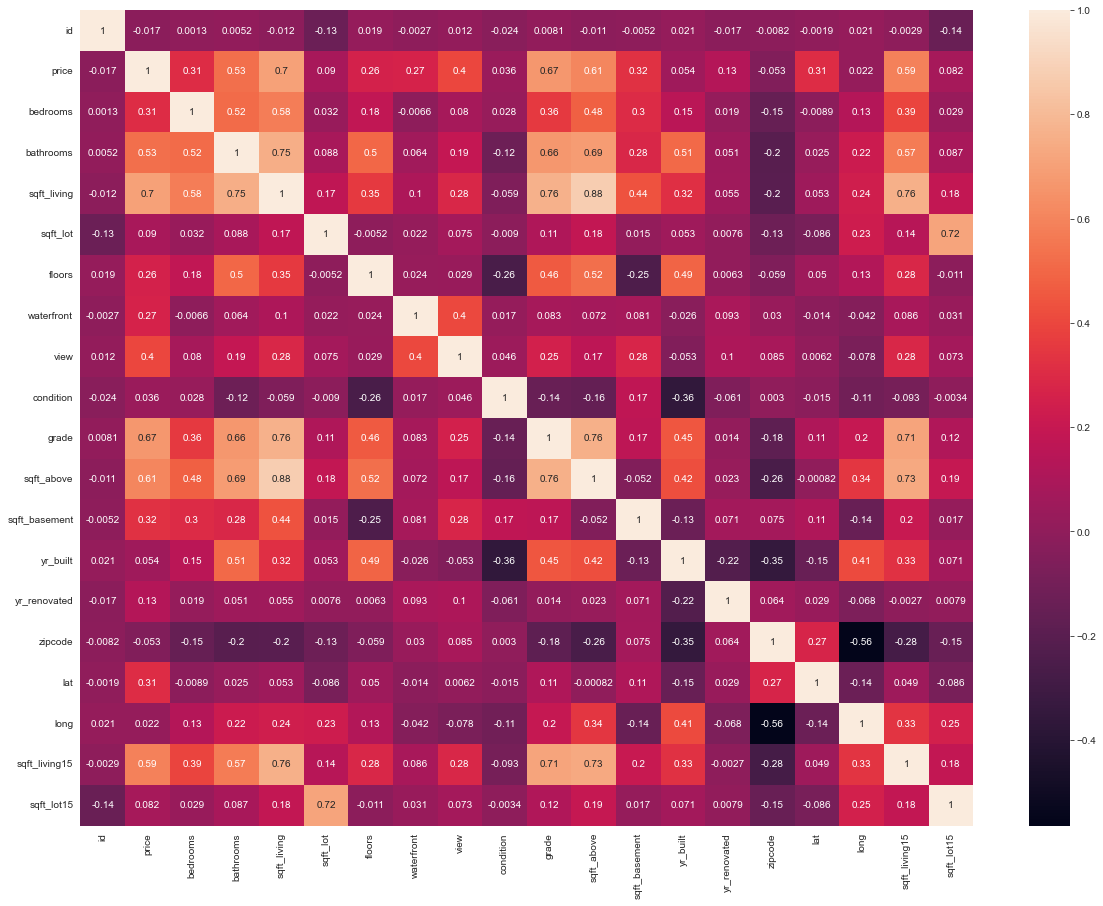

In [11]:
cormap = raw_data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cormap, annot=True)
plt.show()

In [12]:
raw_data.describe(percentiles=[])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
drop_cols = ['id']
data = raw_data.drop(drop_cols, axis = 1)
target = data['price']
data = data.drop(['price'], axis = 1)
data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

data = data.drop("date",axis=1)

data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [15]:
X_train, X_test, y_train, y_test = \
    train_test_split(data, target, random_state=42, train_size=0.8, shuffle=True)
print ("train size={}, test_size={}, total_size={}".format(
    X_train.shape[0], X_test.shape[0], data.shape[0])
)

train size=17290, test_size=4323, total_size=21613


In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(normalize=False)
model.fit(X_train, y_train)
print("num_ftrs = {}, num_coeff = {} ".format(X_train.shape[1], len(model.coef_)))
reg_coeff = dict(zip(data.columns, model.coef_))
print(reg_coeff)

num_ftrs = 21, num_coeff = 21 
{'bedrooms': -34500.2444570076, 'bathrooms': 44645.78172654522, 'sqft_living': 109.07588463093089, 'sqft_lot': 0.08587481774156913, 'floors': 7520.144434627084, 'waterfront': 563025.9976795013, 'view': 53411.74308360903, 'condition': 25847.317823296606, 'grade': 94723.86932727942, 'sqft_above': 70.02501828502682, 'sqft_basement': 39.05086649526265, 'yr_built': -2675.5298328985928, 'yr_renovated': 21.63912858630445, 'zipcode': -553.7085355962422, 'lat': 598270.5352006836, 'long': -195001.8565263733, 'sqft_living15': 21.347778580926388, 'sqft_lot15': -0.32737768517108634, 'year': 36199.605238617405, 'month': 1139.2002658568658, 'day': -347.9048218130536}


Quality Test 39097299121.540955
Quality Control 44951491944.93389


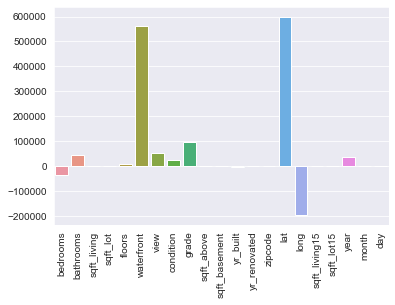

In [17]:
y_pred_train = model.predict(X_train)
print("Quality Test {}".format(mean_squared_error(y_train, y_pred_train)))
y_pred = model.predict(X_test)
print("Quality Control {}".format(mean_squared_error(y_test, y_pred)))

sns.barplot(x = X_train.columns, y=model.coef_)
plt.xticks(rotation=90);

In [18]:
print("Linear regression r2 score: ", r2_score(y_test,y_pred))

Linear regression r2 score:  0.7026559760834121


In [19]:
from sklearn.preprocessing import StandardScaler
X_train_scale = pd.DataFrame(StandardScaler().fit_transform(X_train), columns = X_train.columns)
X_train_scale.set_index(X_train.index, inplace = True)
X_test_scale = pd.DataFrame(StandardScaler().fit_transform(X_test), columns = X_test.columns)
X_test_scale.set_index(X_test.index, inplace = True)

In [20]:
X_train_scale.mean()

bedrooms         1.254713e-15
bathrooms        9.445564e-17
sqft_living     -1.779953e-16
sqft_lot        -3.419442e-17
floors           6.196444e-17
waterfront       1.473945e-15
view             1.872598e-15
condition       -5.756079e-16
grade           -1.006335e-15
sqft_above      -1.104829e-16
sqft_basement   -6.870669e-17
yr_built        -4.439993e-16
yr_renovated     2.951723e-16
zipcode          1.294281e-13
lat             -1.586346e-14
long             3.110085e-14
sqft_living15   -6.238824e-17
sqft_lot15       2.027329e-17
year            -1.969800e-13
month            2.800921e-17
day              9.832120e-17
dtype: float64

In [21]:
model_norm = LinearRegression(normalize=False)
model_norm.fit(X_train_scale, y_train)
reg_coeff_norm = dict(zip(data.columns, model_norm.coef_))
print(reg_coeff_norm)

{'bedrooms': -32132.095075876357, 'bathrooms': 34232.949471812535, 'sqft_living': 80179.08610143689, 'sqft_lot': 3335.216934219659, 'floors': 4081.955764026665, 'waterfront': 47509.32413655728, 'view': 40685.16741146016, 'condition': 16844.148309599062, 'grade': 110857.33169282856, 'sqft_above': 74541.58451667905, 'sqft_basement': 26214.46398182257, 'yr_built': -78753.5574396728, 'yr_renovated': 8623.013702479222, 'zipcode': -29526.253891556073, 'lat': 82817.37892961546, 'long': -27396.63758528638, 'sqft_living15': 14542.3784101222, 'sqft_lot15': -9010.894748586008, 'year': 16911.31374593835, 'month': 3545.745296884441, 'day': -3005.089538334724}


Quality Test 39097299121.54093
Quality Control 45490914561.656364


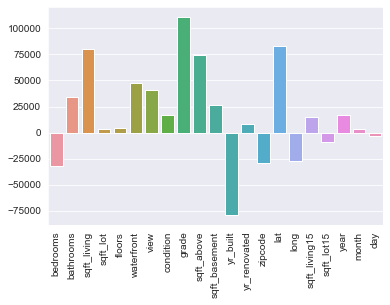

In [22]:
y_pred_train = model_norm.predict(X_train_scale)
print("Quality Test {}".format(mean_squared_error(y_train, y_pred_train)))
y_pred = model_norm.predict(X_test_scale)
print("Quality Control {}".format(mean_squared_error(y_test, y_pred)))

sns.barplot(x = X_train_scale.columns, y=model_norm.coef_)
plt.xticks(rotation=90);

In [23]:
print("Linear regression w/ normalization r2 score: ", r2_score(y_test,y_pred))

Linear regression w/ normalization r2 score:  0.6990878166184413


In [24]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train_scale, y_train)
reg_coeff_ridge = dict(zip(data.columns, ridge_model.coef_))
print(reg_coeff_ridge)

{'bedrooms': -32128.759587897803, 'bathrooms': 34231.92635338419, 'sqft_living': 80176.73625981594, 'sqft_lot': 3335.2906643394685, 'floors': 4082.843101920753, 'waterfront': 47508.345490920714, 'view': 40685.17595116128, 'condition': 16844.915141368474, 'grade': 110851.1380614739, 'sqft_above': 74538.9099438345, 'sqft_basement': 26214.613250793605, 'yr_built': -78747.69963437319, 'yr_renovated': 8624.31986078798, 'zipcode': -29523.000510808088, 'lat': 82815.60757075797, 'long': -27396.20398008285, 'sqft_living15': 14548.03533466781, 'sqft_lot15': -9010.198608520759, 'year': 16909.756160130964, 'month': 3544.570770496265, 'day': -3005.0851427641546}


Quality Test 39097299176.518036
Quality Control 45491113358.28376


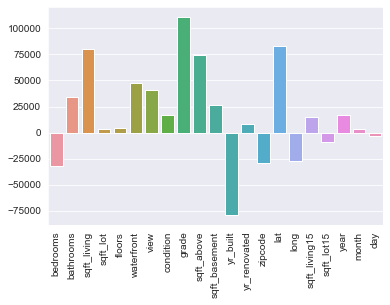

In [25]:
y_pred_train = ridge_model.predict(X_train_scale)
print("Quality Test {}".format(mean_squared_error(y_train, y_pred_train)))
y_pred = ridge_model.predict(X_test_scale)
print("Quality Control {}".format(mean_squared_error(y_test, y_pred)))

sns.barplot(x = X_train_scale.columns, y=ridge_model.coef_)
plt.xticks(rotation=90);

In [26]:
print("Ridge regression r2 score: ", r2_score(y_test,y_pred))

Ridge regression r2 score:  0.6990865016233971


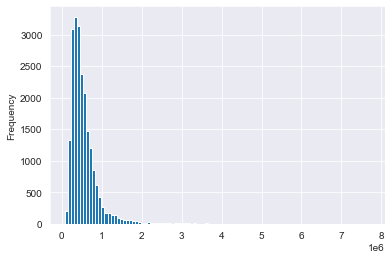

In [27]:
target.plot.hist(bins=100);

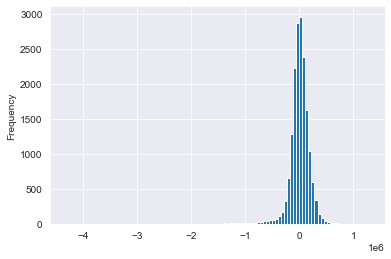

In [28]:
resudal_vec = y_pred_train - y_train
resudal_vec.plot.hist(bins=100);

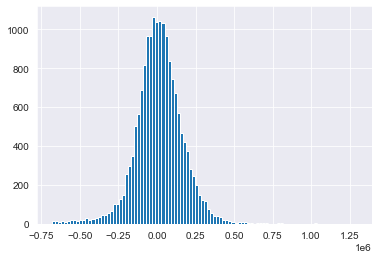

In [29]:
filter_outlier = resudal_vec > resudal_vec.quantile(q=0.01)
resudal_vec[filter_outlier].hist(bins=100);

In [30]:
model_norm = LinearRegression(normalize=False)
model_norm.fit(X_train_scale[filter_outlier], y_train[filter_outlier])
reg_coeff_norm = dict(zip(data.columns, model_norm.coef_))
print(reg_coeff_norm)

{'bedrooms': -21441.52995335378, 'bathrooms': 25472.401847060348, 'sqft_living': -1.1032173326935507e+18, 'sqft_lot': 6530.326774166957, 'floors': 14503.211745448232, 'waterfront': 30121.914897748487, 'view': 36716.40958320639, 'condition': 18921.323449378826, 'grade': 107724.959576668, 'sqft_above': 9.990459587067447e+17, 'sqft_basement': 5.334646075294059e+17, 'yr_built': -68647.21444309545, 'yr_renovated': 8308.487579794939, 'zipcode': -20242.39552709069, 'lat': 79148.05750767073, 'long': -15564.139752643514, 'sqft_living15': 26320.143990160832, 'sqft_lot15': -6712.046140778488, 'year': 15330.297800432736, 'month': 3186.5465219031057, 'day': -1479.243761176234}


Quality Test 22210837093.523563
Quality Control 4.56917220989602e+32


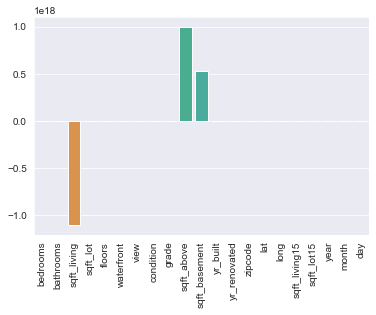

In [31]:
y_pred_train = model_norm.predict(X_train_scale[filter_outlier])
print("Quality Test {}".format(mean_squared_error(y_train[filter_outlier], y_pred_train)))
y_pred = model_norm.predict(X_test_scale)
print("Quality Control {}".format(mean_squared_error(y_test, y_pred)))

sns.barplot(x = X_train_scale.columns, y=model_norm.coef_)
plt.xticks(rotation=90);

In [32]:
print("Linear regression without outliers r2 score: ",r2_score(y_test,y_pred))

Linear regression without outliers r2 score:  -3.02240480143051e+21


In [33]:
compare = pd.DataFrame({'Model/Experiments': ["Linear Regression", "Linear Regression with Normalization", 
                                  "Ridge Regression", "Linear Regression without Outliers"], 
                        'R2 Score': [0.7026, 0.6991, 0.6991, 0.6659]})
compare.sort_values(by='R2 Score', ascending=False)

,Model/Experiments,R2 Score
0,Linear Regression,0.7026
1,Linear Regression with Normalization,0.6991
2,Ridge Regression,0.6991
3,Linear Regression without Outliers,0.6659


In [3]:
from sklearn.model_selection import RandomizedSearchCV

In [12]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [6]:
from sklearn.ensemble import RandomForestRegressor

In [7]:
rf = RandomForestRegressor()

In [13]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [14]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [15]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)